# Primera entrega ML

# El riesgo de la obesidad en la población

### Tema

 El objetivo es utilizar varios factores para predecir el riesgo de obesidad en la población

- Modelo Machine Learning: Regresión para la identificación de factores de riesgo y análisis de tendencias por ahora.

- Target: Mi target será una nueva columna que hare con el imc de cada uno haciendo el carculo de peso y altura

- Metricas: Todavia no lo sé 

### Datasets y fuentes alternativas de datos
Incluye aquí una breve descripción del dataset o datasets para tu proyecto. Incluye también las fuentes de cada uno de ellos.

#### Importaciones:

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import shapiro
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error 
import scipy.stats as stats
from scipy.stats import mannwhitneyu
import scipy.stats
import statsmodels.api as sm
from scipy.stats import f_oneway
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from scipy.stats import spearmanr
from scipy.stats import ttest_ind
import os
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)


#### Enlaces:

https://kaggle.com/competitions/playground-series-s4e2

## ANÁLISIS EXPLORATORIO DE DATOS

### EXPLORACION DE DATOS

In [30]:
ob_train = pd.read_csv("./train.csv")

In [31]:
ob_train.head(20)

id  Gender        Age    Height      Weight  \
0    0    Male  24.443011  1.699998   81.669950   
1    1  Female  18.000000  1.560000   57.000000   
2    2  Female  18.000000  1.711460   50.165754   
3    3  Female  20.952737  1.710730  131.274851   
4    4    Male  31.641081  1.914186   93.798055   
5    5    Male  18.128249  1.748524   51.552595   
6    6    Male  29.883021  1.754711  112.725005   
7    7    Male  29.891473  1.750150  118.206565   
8    8    Male  17.000000  1.700000   70.000000   
9    9  Female  26.000000  1.638836  111.275646   
10  10  Female  20.000000  1.650000   65.000000   
11  11    Male  22.000000  1.700000   70.000000   
12  12    Male  18.000000  1.811189  108.251044   
13  13  Female  21.412538  1.729045  131.529267   
14  14  Female  20.000000  1.570000   49.000000   
15  15    Male  28.377958  1.706525  102.592171   
16  16  Female  34.000000  1.700000   80.000000   
17  17  Female  18.000000  1.560000   50.000000   
18  18    Male  22.000000  1.700000   80.000000   
19  19    Male  25.492855  1.771817  114.470482   

   family_history_with_overweight FAVC      FCVC       NCP        CAEC SMOKE  \
0                             yes  yes  2.000000  2.983297   Sometimes    no   
1                             yes  yes  2.000000  3.000000  Frequently    no   
2                             yes  yes  1.880534  1.411685   Sometimes    no   
3                             yes  yes  3.000000  3.000000   Sometimes    no   
4                             yes  yes  2.679664  1.971472   Sometimes    no   
5                             yes  yes  2.919751  3.000000   Sometimes    no   
6                             yes  yes  1.991240  3.000000   Sometimes    no   
7                             yes  yes  1.397468  3.000000   Sometimes    no   
8                              no  yes  2.000000  3.000000   Sometimes    no   
9                             yes  yes  3.000000  3.000000   Sometimes    no   
10                            yes  yes  3.000000  3.000000   Sometimes    no   
11                            yes   no  2.000000  3.000000          no    no   
12                            yes  yes  2.000000  2.164839   Sometimes    no   
13                            yes  yes  3.000000  3.000000   Sometimes    no   
14                             no   no  2.000000  1.000000   Sometimes    no   
15                            yes  yes  2.636719  3.000000   Sometimes    no   
16                            yes   no  3.000000  3.000000      Always    no   
17                             no  yes  3.000000  3.000000   Sometimes    no   
18                            yes  yes  1.000000  3.000000   Sometimes    no   
19                            yes  yes  1.392665  3.000000   Sometimes    no   

        CH2O  SCC       FAF       TUE       CALC                 MTRANS  \
0   2.763573   no  0.000000  0.976473  Sometimes  Public_Transportation   
1   2.000000   no  1.000000  1.000000         no             Automobile   
2   1.910378   no  0.866045  1.673584         no  Public_Transportation   
3   1.674061   no  1.467863  0.780199  Sometimes  Public_Transportation   
4   1.979848   no  1.967973  0.931721  Sometimes  Public_Transportation   
5   2.137550   no  1.930033  1.000000  Sometimes  Public_Transportation   
6   2.000000   no  0.000000  0.696948  Sometimes             Automobile   
7   2.000000   no  0.598655  0.000000  Sometimes             Automobile   
8   3.000000  yes  1.000000  1.000000         no  Public_Transportation   
9   2.632253   no  0.000000  0.218645  Sometimes  Public_Transportation   
10  3.000000   no  1.000000  0.000000  Sometimes  Public_Transportation   
11  2.000000   no  2.000000  1.000000         no                Walking   
12  2.530157   no  1.000000  0.553311         no  Public_Transportation   
13  1.959531   no  1.425712  0.947884  Sometimes  Public_Transportation   
14  1.000000   no  3.000000  2.000000         no                Walking   
15  1.000000   no  1.995582  0.930836  Sometimes  P

##### Información del dataset:

>- id: Identificación única para cada persona en el conjunto de datos.

>- Gender: Género de la persona

>- Age: Edad de la persona en años.

>- Height: Altura de la persona en metros.

>- Weight: Peso de la persona en kilogramos.

>- family_history_with_overweight: Historial familiar de sobrepeso - si= 1 y no = 0 

>- FAVC: Consumidor de alimentos de alto contenido calórico - si= 1 y no = 0 

>- FCVC: Frecuencia de consumo de verduras.

>- NCP: Número de comidas principales al día.

>- CAEC: Consumo de comida entre comidas - si= 1 y no = 0 

>- SMOKE: Fumador - si= 1 y no = 0 

>- CH2O: Consumo de agua diario en litros.

>- SCC: Consumo de calorías vacías - si= 1 y no = 0 

>- FAF: Frecuencia de actividad física.

>- TUE: Tiempo de uso de dispositivos electrónicos

>- CALC: Consumo de alcohol - si= 1 y no = 0 

>- MTRANS: Medio de transporte utilizado.

>- NObeyesdad: Nivel de obesidad 

#### Información

In [ ]:
ob_train.tail()

id Gender        Age    Height      Weight  \
20753  20753   Male  25.137087  1.766626  114.187096   
20754  20754   Male  18.000000  1.710000   50.000000   
20755  20755   Male  20.101026  1.819557  105.580491   
20756  20756   Male  33.852953  1.700000   83.520113   
20757  20757   Male  26.680376  1.816547  118.134898   

      family_history_with_overweight FAVC      FCVC       NCP        CAEC  \
20753                            yes  yes  2.919584  3.000000   Sometimes   
20754                             no  yes  3.000000  4.000000  Frequently   
20755                            yes  yes  2.407817  3.000000   Sometimes   
20756                            yes  yes  2.671238  1.971472   Sometimes   
20757                            yes  yes  3.000000  3.000000   Sometimes   

      SMOKE      CH2O SCC       FAF       TUE       CALC  \
20753    no  2.151809  no  1.330519  0.196680  Sometimes   
20754    no  1.000000  no  2.000000  1.000000  Sometimes   
20755    no  2.000000  no  1.158040  1.198439         no   
20756    no  2.144838  no  0.000000  0.973834         no   
20757    no  2.003563  no  0.684487  0.713823  Sometimes   

                      MTRANS           NObeyesdad  
20753  Public_Transportation      Obesity_Type_II  
20754  Public_Transportation  Insufficient_Weight  
20755  Public_Transportation      Obesity_Type_II  
20756             Automobile  Overweight_Level_II  
20757  Public_Transportation      Obesity_Type_II

In [ ]:
ob_train.shape

(20758, 18)

In [ ]:
ob_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [ ]:
ob_train.columns

Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [ ]:
ob_train.describe()

id           Age        Height        Weight          FCVC  \
count  20758.00000  20758.000000  20758.000000  20758.000000  20758.000000   
mean   10378.50000     23.841804      1.700245     87.887768      2.445908   
std     5992.46278      5.688072      0.087312     26.379443      0.533218   
min        0.00000     14.000000      1.450000     39.000000      1.000000   
25%     5189.25000     20.000000      1.631856     66.000000      2.000000   
50%    10378.50000     22.815416      1.700000     84.064875      2.393837   
75%    15567.75000     26.000000      1.762887    111.600553      3.000000   
max    20757.00000     61.000000      1.975663    165.057269      3.000000   

                NCP          CH2O           FAF           TUE  
count  20758.000000  20758.000000  20758.000000  20758.000000  
mean       2.761332      2.029418      0.981747      0.616756  
std        0.705375      0.608467      0.838302      0.602113  
min        1.000000      1.000000      0.000000      0.000000  
25%        3.000000      1.792022      0.008013      0.000000  
50%        3.000000      2.000000      1.000000      0.573887  
75%        3.000000      2.549617      1.587406      1.000000  
max        4.000000      3.000000      3.000000      2.000000

In [ ]:
ob_train.describe(exclude=object).round(2)

id       Age    Height    Weight      FCVC       NCP      CH2O  \
count  20758.00  20758.00  20758.00  20758.00  20758.00  20758.00  20758.00   
mean   10378.50     23.84      1.70     87.89      2.45      2.76      2.03   
std     5992.46      5.69      0.09     26.38      0.53      0.71      0.61   
min        0.00     14.00      1.45     39.00      1.00      1.00      1.00   
25%     5189.25     20.00      1.63     66.00      2.00      3.00      1.79   
50%    10378.50     22.82      1.70     84.06      2.39      3.00      2.00   
75%    15567.75     26.00      1.76    111.60      3.00      3.00      2.55   
max    20757.00     61.00      1.98    165.06      3.00      4.00      3.00   

            FAF       TUE  
count  20758.00  20758.00  
mean       0.98      0.62  
std        0.84      0.60  
min        0.00      0.00  
25%        0.01      0.00  
50%        1.00      0.57  
75%        1.59      1.00  
max        3.00      2.00

In [ ]:
ob_train.describe(include=object).round(2)

Gender family_history_with_overweight   FAVC       CAEC  SMOKE    SCC  \
count    20758                          20758  20758      20758  20758  20758   
unique       2                              2      2          4      2      2   
top     Female                            yes    yes  Sometimes     no     no   
freq     10422                          17014  18982      17529  20513  20071   

             CALC                 MTRANS        NObeyesdad  
count       20758                  20758             20758  
unique          3                      5                 7  
top     Sometimes  Public_Transportation  Obesity_Type_III  
freq        15066                  16687              4046

In [ ]:
ob_train.isna().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [ ]:
ob_train.isna().sum()/len(ob_train)*100

id                                0.0
Gender                            0.0
Age                               0.0
Height                            0.0
Weight                            0.0
family_history_with_overweight    0.0
FAVC                              0.0
FCVC                              0.0
NCP                               0.0
CAEC                              0.0
SMOKE                             0.0
CH2O                              0.0
SCC                               0.0
FAF                               0.0
TUE                               0.0
CALC                              0.0
MTRANS                            0.0
NObeyesdad                        0.0
dtype: float64

In [ ]:
ob_train.duplicated().sum()

0

### PROCESAMIENTO DE DATOS

#### MODIFICACIÓN DE COLUMNAS


In [ ]:
ob_train.head()

id  Gender        Age    Height      Weight family_history_with_overweight  \
0   0    Male  24.443011  1.699998   81.669950                            yes   
1   1  Female  18.000000  1.560000   57.000000                            yes   
2   2  Female  18.000000  1.711460   50.165754                            yes   
3   3  Female  20.952737  1.710730  131.274851                            yes   
4   4    Male  31.641081  1.914186   93.798055                            yes   

  FAVC      FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF  \
0  yes  2.000000  2.983297   Sometimes    no  2.763573  no  0.000000   
1  yes  2.000000  3.000000  Frequently    no  2.000000  no  1.000000   
2  yes  1.880534  1.411685   Sometimes    no  1.910378  no  0.866045   
3  yes  3.000000  3.000000   Sometimes    no  1.674061  no  1.467863   
4  yes  2.679664  1.971472   Sometimes    no  1.979848  no  1.967973   

        TUE       CALC                 MTRANS           NObeyesdad  
0  0.976473  Sometimes  Public_Transportation  Overweight_Level_II  
1  1.000000         no             Automobile        Normal_Weight  
2  1.673584         no  Public_Transportation  Insufficient_Weight  
3  0.780199  Sometimes  Public_Transportation     Obesity_Type_III  
4  0.931721  Sometimes  Public_Transportation  Overweight_Level_II

#### HEIGHT

In [ ]:
ob_train["Height"].unique()

array([1.699998, 1.56    , 1.71146 , ..., 1.791366, 1.672594, 1.536819])

- Hacer un round(2)

In [ ]:
ob_train["Height"] = ob_train["Height"].round(2)

#### WEIGHT

In [ ]:
ob_train["Weight"].unique()

array([ 81.66995 ,  57.      ,  50.165754, ..., 152.063947,  79.5     ,
        80.615325])

- Hacer un round(1)

In [ ]:
ob_train["Weight"] = ob_train["Weight"].round(0)

#### CREAR COLUMNA IMC

In [ ]:
ob_train["IMC"]= ob_train["Weight"] /(ob_train["Height"] ** 2)

In [ ]:
ob_train["IMC"]= ob_train["IMC"].astype(int)

In [ ]:
i= ob_train.pop("IMC")
ob_train.insert(5,"IMC",i)

In [ ]:
ob_train.head(8)

id  Gender        Age  Height  Weight  IMC family_history_with_overweight  \
0   0    Male  24.443011    1.70    82.0   28                            yes   
1   1  Female  18.000000    1.56    57.0   23                            yes   
2   2  Female  18.000000    1.71    50.0   17                            yes   
3   3  Female  20.952737    1.71   131.0   44                            yes   
4   4    Male  31.641081    1.91    94.0   25                            yes   
5   5    Male  18.128249    1.75    52.0   16                            yes   
6   6    Male  29.883021    1.75   113.0   36                            yes   
7   7    Male  29.891473    1.75   118.0   38                            yes   

  FAVC      FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF  \
0  yes  2.000000  2.983297   Sometimes    no  2.763573  no  0.000000   
1  yes  2.000000  3.000000  Frequently    no  2.000000  no  1.000000   
2  yes  1.880534  1.411685   Sometimes    no  1.910378  no  0.866045   
3  yes  3.000000  3.000000   Sometimes    no  1.674061  no  1.467863   
4  yes  2.679664  1.971472   Sometimes    no  1.979848  no  1.967973   
5  yes  2.919751  3.000000   Sometimes    no  2.137550  no  1.930033   
6  yes  1.991240  3.000000   Sometimes    no  2.000000  no  0.000000   
7  yes  1.397468  3.000000   Sometimes    no  2.000000  no  0.598655   

        TUE       CALC                 MTRANS           NObeyesdad  
0  0.976473  Sometimes  Public_Transportation  Overweight_Level_II  
1  1.000000         no             Automobile        Normal_Weight  
2  1.673584         no  Public_Transportation  Insufficient_Weight  
3  0.780199  Sometimes  Public_Transportation     Obesity_Type_III  
4  0.931721  Sometimes  Public_Transportation  Overweight_Level_II  
5  1.000000  Sometimes  Public_Transportation  Insufficient_Weight  
6  0.696948  Sometimes             Automobile      Obesity_Type_II  
7  0.000000  Sometimes             Automobile      Obesity_Type_II

#### AGE

In [ ]:
ob_train["Age"].unique()

array([24.443011, 18.      , 20.952737, ..., 25.746113, 38.08886 ,
       33.852953])

- Convertirlo a numero entero

In [ ]:
ob_train["Age"] = ob_train["Age"].astype(int)

In [ ]:
ob_train.head()

id  Gender  Age  Height  Weight  IMC family_history_with_overweight FAVC  \
0   0    Male   24    1.70    82.0   28                            yes  yes   
1   1  Female   18    1.56    57.0   23                            yes  yes   
2   2  Female   18    1.71    50.0   17                            yes  yes   
3   3  Female   20    1.71   131.0   44                            yes  yes   
4   4    Male   31    1.91    94.0   25                            yes  yes   

       FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF       TUE  \
0  2.000000  2.983297   Sometimes    no  2.763573  no  0.000000  0.976473   
1  2.000000  3.000000  Frequently    no  2.000000  no  1.000000  1.000000   
2  1.880534  1.411685   Sometimes    no  1.910378  no  0.866045  1.673584   
3  3.000000  3.000000   Sometimes    no  1.674061  no  1.467863  0.780199   
4  2.679664  1.971472   Sometimes    no  1.979848  no  1.967973  0.931721   

        CALC                 MTRANS           NObeyesdad  
0  Sometimes  Public_Transportation  Overweight_Level_II  
1         no             Automobile        Normal_Weight  
2         no  Public_Transportation  Insufficient_Weight  
3  Sometimes  Public_Transportation     Obesity_Type_III  
4  Sometimes  Public_Transportation  Overweight_Level_II

#### FCVC	

In [ ]:
ob_train["FAVC"].unique()

array(['yes', 'no'], dtype=object)

- convertir en un int

In [ ]:
ob_train["FCVC"]= ob_train["FCVC"].astype(int)

In [ ]:
ob_train.head()

id  Gender  Age  Height  Weight  IMC family_history_with_overweight FAVC  \
0   0    Male   24    1.70    82.0   28                            yes  yes   
1   1  Female   18    1.56    57.0   23                            yes  yes   
2   2  Female   18    1.71    50.0   17                            yes  yes   
3   3  Female   20    1.71   131.0   44                            yes  yes   
4   4    Male   31    1.91    94.0   25                            yes  yes   

   FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF       TUE  \
0     2  2.983297   Sometimes    no  2.763573  no  0.000000  0.976473   
1     2  3.000000  Frequently    no  2.000000  no  1.000000  1.000000   
2     1  1.411685   Sometimes    no  1.910378  no  0.866045  1.673584   
3     3  3.000000   Sometimes    no  1.674061  no  1.467863  0.780199   
4     2  1.971472   Sometimes    no  1.979848  no  1.967973  0.931721   

        CALC                 MTRANS           NObeyesdad  
0  Sometimes  Public_Transportation  Overweight_Level_II  
1         no             Automobile        Normal_Weight  
2         no  Public_Transportation  Insufficient_Weight  
3  Sometimes  Public_Transportation     Obesity_Type_III  
4  Sometimes  Public_Transportation  Overweight_Level_II

#### NCP

In [ ]:
ob_train["NCP"].unique()

array([2.983297, 3.      , 1.411685, 1.971472, 2.164839, 1.      ,
       2.954446, 1.893811, 3.998618, 1.703299, 2.937989, 2.996444,
       2.581015, 2.473913, 1.437959, 2.989791, 4.      , 2.853676,
       1.104642, 3.362758, 1.169173, 1.411808, 2.98212 , 1.81698 ,
       3.762778, 2.976211, 2.993623, 3.994588, 3.087544, 2.372311,
       2.376374, 2.884479, 2.994198, 2.812283, 3.654061, 1.845858,
       2.475444, 1.015488, 2.806298, 1.338033, 1.077331, 3.995957,
       2.884848, 2.283673, 2.806341, 1.863012, 3.590039, 2.608416,
       2.129909, 2.18162 , 1.672706, 2.951837, 2.692889, 3.986652,
       2.449723, 2.966803, 2.9948  , 1.473088, 1.882158, 2.7976  ,
       2.13229 , 2.999346, 1.320768, 1.894384, 2.122545, 2.99321 ,
       3.205009, 1.163666, 1.08687 , 2.374791, 2.993634, 2.937607,
       2.831771, 3.715148, 2.272214, 2.918124, 3.546352, 1.337035,
       1.226342, 3.520555, 1.105617, 1.834472, 1.867836, 1.250548,
       1.818026, 2.567567, 3.559841, 1.134042, 3.821168, 3.249

- CONVERTIR EN UN ENTERO

In [ ]:
ob_train["NCP"]= ob_train["NCP"].astype(int)

#### CH2O

In [ ]:
ob_train["CH2O"].unique()

array([2.763573, 2.      , 1.910378, ..., 2.151166, 1.485836, 1.365188])

- Hacer un round(1)

In [ ]:
ob_train["CH2O"]= ob_train["CH2O"].round(1)

In [ ]:
ob_train.head()

id  Gender  Age  Height  Weight  IMC family_history_with_overweight FAVC  \
0   0    Male   24    1.70    82.0   28                            yes  yes   
1   1  Female   18    1.56    57.0   23                            yes  yes   
2   2  Female   18    1.71    50.0   17                            yes  yes   
3   3  Female   20    1.71   131.0   44                            yes  yes   
4   4    Male   31    1.91    94.0   25                            yes  yes   

   FCVC  NCP        CAEC SMOKE  CH2O SCC       FAF       TUE       CALC  \
0     2    2   Sometimes    no   2.8  no  0.000000  0.976473  Sometimes   
1     2    3  Frequently    no   2.0  no  1.000000  1.000000         no   
2     1    1   Sometimes    no   1.9  no  0.866045  1.673584         no   
3     3    3   Sometimes    no   1.7  no  1.467863  0.780199  Sometimes   
4     2    1   Sometimes    no   2.0  no  1.967973  0.931721  Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation  Overweight_Level_II  
1             Automobile        Normal_Weight  
2  Public_Transportation  Insufficient_Weight  
3  Public_Transportation     Obesity_Type_III  
4  Public_Transportation  Overweight_Level_II

#### FAF	

In [ ]:
ob_train["FAF"].unique()

array([0.      , 1.      , 0.866045, ..., 0.540397, 0.271174, 0.988668])

- Hacer un round(2)

In [ ]:
ob_train["FAF"]=ob_train["FAF"].round(1)

In [ ]:
ob_train.head()

id  Gender  Age  Height  Weight  IMC family_history_with_overweight FAVC  \
0   0    Male   24    1.70    82.0   28                            yes  yes   
1   1  Female   18    1.56    57.0   23                            yes  yes   
2   2  Female   18    1.71    50.0   17                            yes  yes   
3   3  Female   20    1.71   131.0   44                            yes  yes   
4   4    Male   31    1.91    94.0   25                            yes  yes   

   FCVC  NCP        CAEC SMOKE  CH2O SCC  FAF       TUE       CALC  \
0     2    2   Sometimes    no   2.8  no  0.0  0.976473  Sometimes   
1     2    3  Frequently    no   2.0  no  1.0  1.000000         no   
2     1    1   Sometimes    no   1.9  no  0.9  1.673584         no   
3     3    3   Sometimes    no   1.7  no  1.5  0.780199  Sometimes   
4     2    1   Sometimes    no   2.0  no  2.0  0.931721  Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation  Overweight_Level_II  
1             Automobile        Normal_Weight  
2  Public_Transportation  Insufficient_Weight  
3  Public_Transportation     Obesity_Type_III  
4  Public_Transportation  Overweight_Level_II

#### TUE

In [ ]:
ob_train["TUE"].unique()

array([0.976473, 1.      , 1.673584, ..., 1.217929, 1.439004, 0.768375])

- Hacer un round(1)

In [ ]:
ob_train["TUE"]=ob_train["TUE"].round(1)

In [ ]:
ob_train.head()

id  Gender  Age  Height  Weight  IMC family_history_with_overweight FAVC  \
0   0    Male   24    1.70    82.0   28                            yes  yes   
1   1  Female   18    1.56    57.0   23                            yes  yes   
2   2  Female   18    1.71    50.0   17                            yes  yes   
3   3  Female   20    1.71   131.0   44                            yes  yes   
4   4    Male   31    1.91    94.0   25                            yes  yes   

   FCVC  NCP        CAEC SMOKE  CH2O SCC  FAF  TUE       CALC  \
0     2    2   Sometimes    no   2.8  no  0.0  1.0  Sometimes   
1     2    3  Frequently    no   2.0  no  1.0  1.0         no   
2     1    1   Sometimes    no   1.9  no  0.9  1.7         no   
3     3    3   Sometimes    no   1.7  no  1.5  0.8  Sometimes   
4     2    1   Sometimes    no   2.0  no  2.0  0.9  Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation  Overweight_Level_II  
1             Automobile        Normal_Weight  
2  Public_Transportation  Insufficient_Weight  
3  Public_Transportation     Obesity_Type_III  
4  Public_Transportation  Overweight_Level_II

In [ ]:
ob_train["TUE"].unique()

array([1. , 1.7, 0.8, 0.9, 0.7, 0. , 0.2, 0.6, 2. , 0.1, 1.3, 0.3, 0.5,
       0.4, 1.5, 1.2, 1.4, 1.6, 1.9, 1.1, 1.8])

#### ELIMINACIÓN DE COLUMNAS

In [ ]:
ob_train= ob_train.drop("MTRANS", axis=1)
ob_train= ob_train.drop("id", axis=1)

In [ ]:
ob_train.head()

Gender  Age  Height  Weight  IMC family_history_with_overweight FAVC  FCVC  \
0    Male   24    1.70    82.0   28                            yes  yes     2   
1  Female   18    1.56    57.0   23                            yes  yes     2   
2  Female   18    1.71    50.0   17                            yes  yes     1   
3  Female   20    1.71   131.0   44                            yes  yes     3   
4    Male   31    1.91    94.0   25                            yes  yes     2   

   NCP        CAEC SMOKE  CH2O SCC  FAF  TUE       CALC           NObeyesdad  
0    2   Sometimes    no   2.8  no  0.0  1.0  Sometimes  Overweight_Level_II  
1    3  Frequently    no   2.0  no  1.0  1.0         no        Normal_Weight  
2    1   Sometimes    no   1.9  no  0.9  1.7         no  Insufficient_Weight  
3    3   Sometimes    no   1.7  no  1.5  0.8  Sometimes     Obesity_Type_III  
4    1   Sometimes    no   2.0  no  2.0  0.9  Sometimes  Overweight_Level_II

### GUARDADO DEL DATASET

In [12]:
ob_train.to_csv("ob_train.csv",index=False)

NameError: name 'ob_train' is not defined

### ANÁLISIS EXPLORATORIO Y VISUALIZACIÓN

In [157]:
ob_train.head(20)

Gender  Age  Height  Weight  IMC family_history_with_overweight FAVC  \
0     Male   24    1.70    82.0   28                            yes  yes   
1   Female   18    1.56    57.0   23                            yes  yes   
2   Female   18    1.71    50.0   17                            yes  yes   
3   Female   20    1.71   131.0   44                            yes  yes   
4     Male   31    1.91    94.0   25                            yes  yes   
5     Male   18    1.75    52.0   16                            yes  yes   
6     Male   29    1.75   113.0   36                            yes  yes   
7     Male   29    1.75   118.0   38                            yes  yes   
8     Male   17    1.70    70.0   24                             no  yes   
9   Female   26    1.64   111.0   41                            yes  yes   
10  Female   20    1.65    65.0   23                            yes  yes   
11    Male   22    1.70    70.0   24                            yes   no   
12    Male   18    1.81   108.0   32                            yes  yes   
13  Female   21    1.73   132.0   44                            yes  yes   
14  Female   20    1.57    49.0   19                             no   no   
15    Male   28    1.71   103.0   35                            yes  yes   
16  Female   34    1.70    80.0   27                            yes   no   
17  Female   18    1.56    50.0   20                             no  yes   
18    Male   22    1.70    80.0   27                            yes  yes   
19    Male   25    1.77   114.0   36                            yes  yes   

    FCVC  NCP        CAEC SMOKE  CH2O  SCC  FAF  TUE       CALC  \
0      2    2   Sometimes    no   2.8   no  0.0  1.0  Sometimes   
1      2    3  Frequently    no   2.0   no  1.0  1.0         no   
2      1    1   Sometimes    no   1.9   no  0.9  1.7         no   
3      3    3   Sometimes    no   1.7   no  1.5  0.8  Sometimes   
4      2    1   Sometimes    no   2.0   no  2.0  0.9  Sometimes   
5      2    3   Sometimes    no   2.1   no  1.9  1.0  Sometimes   
6      1    3   Sometimes    no   2.0   no  0.0  0.7  Sometimes   
7      1    3   Sometimes    no   2.0   no  0.6  0.0  Sometimes   
8      2    3   Sometimes    no   3.0  yes  1.0  1.0         no   
9      3    3   Sometimes    no   2.6   no  0.0  0.2  Sometimes   
10     3    3   Sometimes    no   3.0   no  1.0  0.0  Sometimes   
11     2    3          no    no   2.0   no  2.0  1.0         no   
12     2    2   Sometimes    no   2.5   no  1.0  0.6         no   
13     3    3   Sometimes    no   2.0   no  1.4  0.9  Sometimes   
14     2    1   Sometimes    no   1.0   no  3.0  2.0         no   
15     2    3   Sometimes    no   1.0   no  2.0  0.9  Sometimes   
16     3    3      Always    no   2.0   no  0.0  0.0         no   
17     3    3   Sometimes    no   1.0   no  1.0  0.0  Sometimes   
18     1    3   Sometimes    no   2.0   no  0.0  1.0         no   
19     1    3   Sometimes    no   1.2   no  1.1  0.6  Sometimes   

             NObeyesdad  
0   Overweight_Level_II  
1         Normal_Weight  
2   Insufficient_Weight  
3      Obesity_Type_III  
4   Overweight_Level_II  
5   Insufficient_Weight  
6       Obesity_Type_II  
7       Obesity_Type_II  
8    Overweight_Level_I  
9      Obesity_Type_III  
10   Overweight_Level_I  
11        Normal_Weight  
12       Obesity_Type_I  
13     Obesity_Type_III  
14        Normal_Weight  
15      Obesity_Type_II  
16  Overweight_Level_II  
17        Normal_Weight  
18  Overweight_Level_II  
19      Obesity_Type_II

#### Información

In [158]:
# DATASET VARIABLES NUMERICAS
ob_num= ob_train.select_dtypes(include=["number"])
ob_num

Age  Height  Weight  IMC  FCVC  NCP  CH2O  FAF  TUE
0       24    1.70    82.0   28     2    2   2.8  0.0  1.0
1       18    1.56    57.0   23     2    3   2.0  1.0  1.0
2       18    1.71    50.0   17     1    1   1.9  0.9  1.7
3       20    1.71   131.0   44     3    3   1.7  1.5  0.8
4       31    1.91    94.0   25     2    1   2.0  2.0  0.9
...    ...     ...     ...  ...   ...  ...   ...  ...  ...
20753   25    1.77   114.0   36     2    3   2.2  1.3  0.2
20754   18    1.71    50.0   17     3    4   1.0  2.0  1.0
20755   20    1.82   106.0   32     2    3   2.0  1.2  1.2
20756   33    1.70    84.0   29     2    1   2.1  0.0  1.0
20757   26    1.82   118.0   35     3    3   2.0  0.7  0.7

[20758 rows x 9 columns]

In [159]:
ob_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          20758 non-null  object 
 1   Age                             20758 non-null  int32  
 2   Height                          20758 non-null  float64
 3   Weight                          20758 non-null  float64
 4   IMC                             20758 non-null  int32  
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  int32  
 8   NCP                             20758 non-null  int32  
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

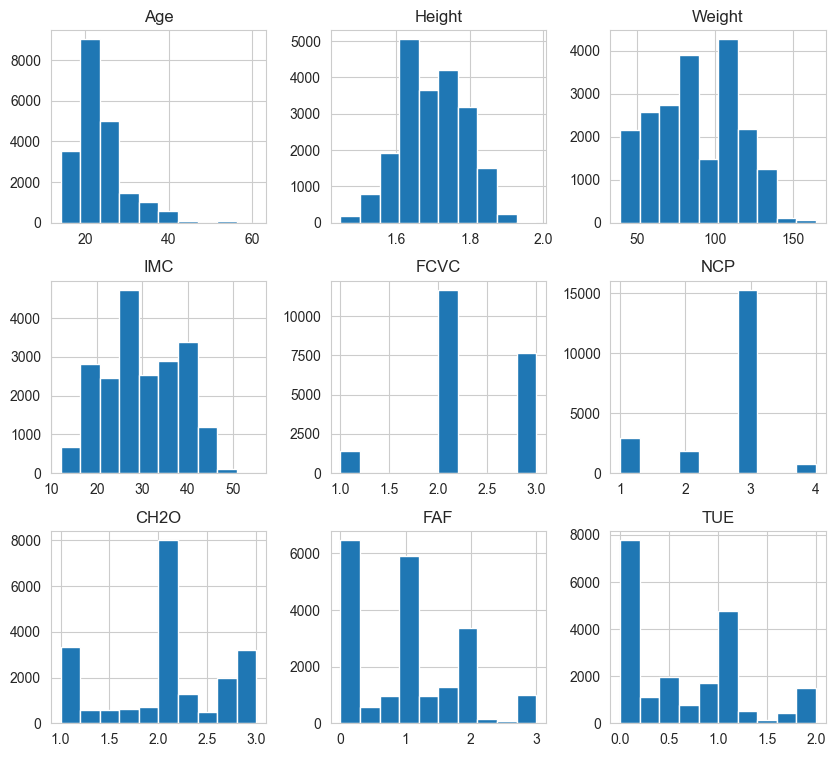

In [160]:
ob_num.hist(figsize=(10, 9));

#### Análisis univariante

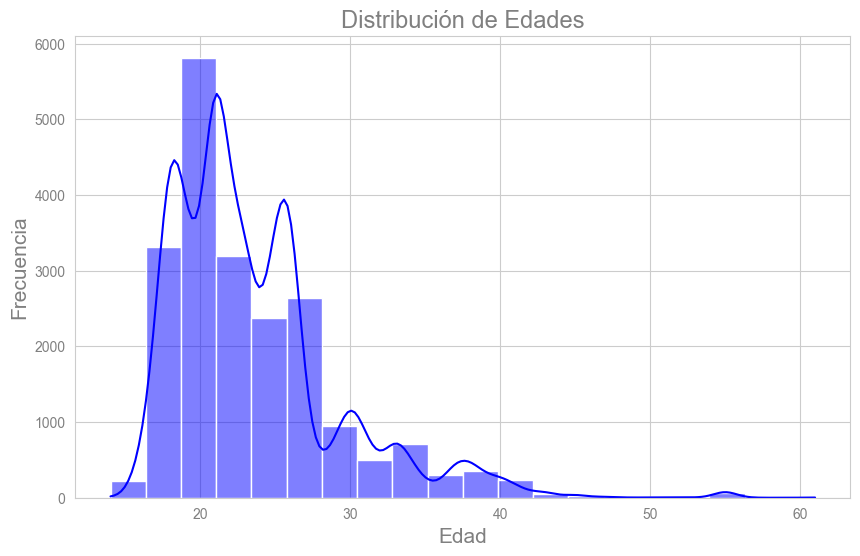

In [161]:
#EDADES
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.histplot(data=ob_train, x="Age", bins=20, kde=True, color='blue')
plt.title("Distribución de Edades", color="grey", fontsize=17)
plt.xlabel("Edad", color="grey", fontsize=15)
plt.ylabel("Frecuencia", color="grey", fontsize=15)
plt.tick_params(axis="x", colors="grey")
plt.tick_params(axis="y", colors="grey")
plt.show()

In [162]:
genero= ob_train["Gender"].value_counts()
porcentajes= (genero /genero.sum()*100).round(2)

fig = px.bar(x=genero.index, y=genero.values, color=genero.index,
             text=porcentajes.values, labels={"x":"Género", "y":"Frecuencia","color":"Género"},
             title=" Géneros")

fig.update_traces(marker_color=["#1f77b4","#ff7f0e"], opacity=0.7)  
fig.update_layout(font=dict(color="grey"))  
fig.update_xaxes(tickfont=dict(color="grey")) 
fig.update_yaxes(tickfont=dict(color="grey")) 

fig.show()

In [163]:
fig= px.histogram(ob_train, x="Height",nbins=20, opacity=0.7,color_discrete_sequence=["salmon"])
fig.update_layout(
    title="Histograma de la Altura",
    xaxis_title="Altura",
    yaxis_title="Frecuencia",
    bargap=0.1, 
    showlegend=False 
)

fig.show()

In [164]:
fig= px.histogram(ob_train,x="Weight", nbins=20,opacity=0.7,color_discrete_sequence=["skyblue"])

fig.update_layout(
    title="Histograma del Peso",
    xaxis_title="Peso",
    yaxis_title="Frecuencia",
    bargap=0.1,  
    showlegend=False 
)
fig.show()

In [165]:
fig= px.histogram(ob_train, y="IMC", title="Distribución del IMC",nbins=20, opacity=0.7)

fig.update_traces(marker_color="#1f77b4",opacity=0.7)  
fig.update_layout(font=dict(color="grey")) 
fig.update_xaxes(title="IMC", tickfont=dict(color="grey")) 
fig.update_yaxes(title="Frecuencia", tickfont=dict(color="grey"))

fig.show()

In [166]:
#nivel de obesidad
fig= px.histogram(ob_train, x="NObeyesdad", title="Nivel de Obesidad",
                   labels={"NObeyesdad": "Nivel de Obesidad","count": "Frecuencia"},
                   template="plotly_dark",
                   opacity=0.7,color_discrete_sequence=["#1f77b4"])

fig.update_layout(font=dict(color="white")) 
fig.update_xaxes(title="Nivel de Obesidad",tickfont=dict(color="white")) 
fig.update_yaxes(title="Frecuencia", tickfont=dict(color="white")) 

fig.show()

In [168]:
#CORRELACION ENTRE PESO E IMC
fig= px.density_heatmap(ob_train,x="Weight", y="IMC",title="Relación entre Peso e IMC",
                         labels={"Weight":"Peso","IMC":"IMC"})

fig.show()

In [169]:
fig= px.box(ob_train, x="Gender", y="Weight", color="Gender", 
             title="Boxplot del Peso por Género",
             labels={"Gender": "Género", "Weight":"Peso"},
             category_orders={"Gender": ["Hombre","Mujer"]},
             template="plotly_dark")

fig.update_layout(font=dict(color="white"))
fig.update_xaxes(tickfont=dict(color="white"))
fig.update_yaxes(tickfont=dict(color="white"))

fig.show()

In [170]:
fig = px.scatter(ob_train, x='Age', y='NObeyesdad', color='NObeyesdad',
                 title='Relación entre Edad y Nivel de Obesidad',
                 labels={'Age': 'Edad', 'NObeyesdad': 'Nivel de Obesidad'},
                 category_orders={'NObeyesdad': ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I',
                                                   'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II',
                                                   'Obesity_Type_III']},
                 template='plotly_dark')

fig.update_layout(font=dict(color='white')) 
fig.update_xaxes(title='Edad', tickfont=dict(color='white'))
fig.update_yaxes(title='Nivel de Obesidad', tickfont=dict(color='white')) 

fig.show()

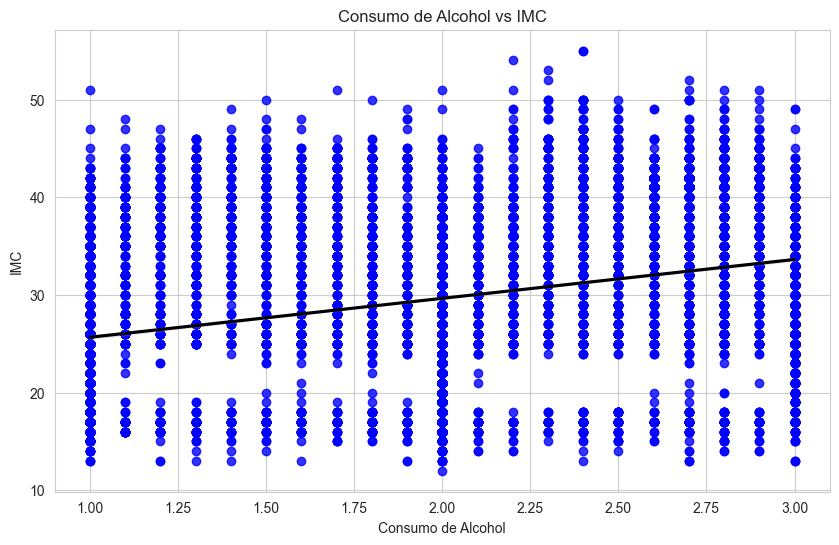

In [171]:
ob_train["CH2O"]= pd.to_numeric(ob_train["CH2O"], errors="coerce")
ob_train["IMC"]= pd.to_numeric(ob_train["IMC"], errors="coerce")

plt.figure(figsize=(10, 6))
sns.regplot(data=ob_train, x="CH2O", y="IMC",scatter_kws={"color":"blue"},line_kws={"color":"black"})
plt.title("Consumo de Alcohol vs IMC")
plt.xlabel("Consumo de Alcohol")
plt.ylabel("IMC")
plt.show()

In [183]:
ob_train.head()

Gender  Age  Height  Weight  IMC family_history_with_overweight FAVC  FCVC  \
0    Male   24    1.70    82.0   28                            yes  yes     2   
1  Female   18    1.56    57.0   23                            yes  yes     2   
2  Female   18    1.71    50.0   17                            yes  yes     1   
3  Female   20    1.71   131.0   44                            yes  yes     3   
4    Male   31    1.91    94.0   25                            yes  yes     2   

   NCP        CAEC SMOKE CH2O SCC  FAF  TUE       CALC           NObeyesdad  
0    2   Sometimes    no  2.8  no  0.0  1.0  Sometimes  Overweight_Level_II  
1    3  Frequently    no  2.0  no  1.0  1.0         no        Normal_Weight  
2    1   Sometimes    no  1.9  no  0.9  1.7         no  Insufficient_Weight  
3    3   Sometimes    no  1.7  no  1.5  0.8  Sometimes     Obesity_Type_III  
4    1   Sometimes    no  2.0  no  2.0  0.9  Sometimes  Overweight_Level_II

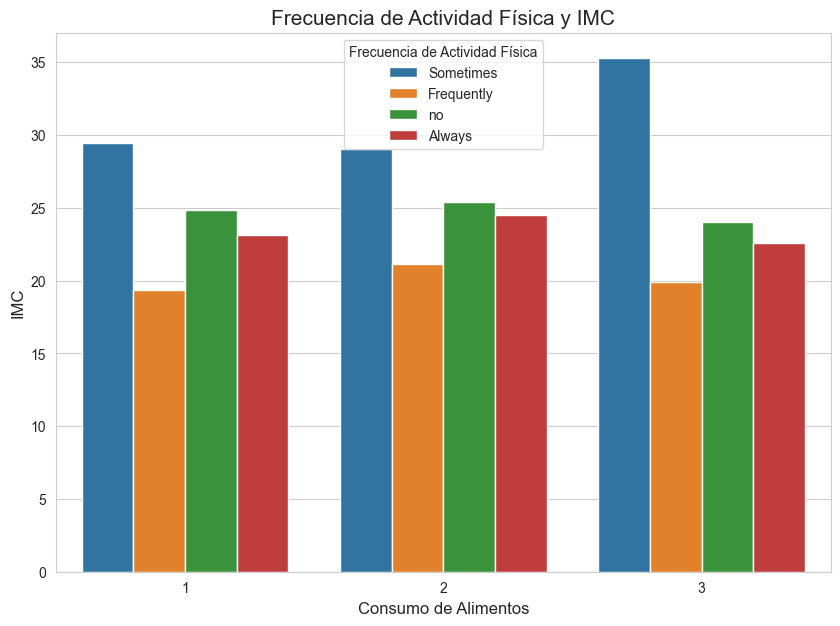

In [209]:
# x="FCVC", y="IMC", hue="CAEC"
plt.figure(figsize=(10, 7))
sns.barplot(data=ob_train, x="FCVC", y="IMC", hue="CAEC", ci=None)
plt.title("Frecuencia de Actividad Física y IMC", fontsize=15)
plt.xlabel("Consumo de Alimentos", fontsize=12)
plt.ylabel("IMC", fontsize=12)
plt.legend(title="Frecuencia de Actividad Física", loc='upper left')
plt.legend(title="Frecuencia de Actividad Física")

plt.show()

### TEST DE HIPOTESIS

> 1. hay diferencia significativa en el Índice de Masa Corporal (IMC) y edad.

> 2. Hay asociación entre el nivel de actividad física y el IMC

> 3. Hay una diferencia significativa en el consumo de calorías y el IMC

> 4. Hay una diferencia significativa en el IMC entre individuos con y sin antecedentes familiares de obesidad

> 5. Existe una asociación significativa entre el IMC y la altura, el peso y el género

> 6. Existe un efecto conjunto significativo del consumo de alimentos, la frecuencia de actividad física y el género en el IMC


##### 1. hay diferencia significativa en el Índice de Masa Corporal (IMC) y edad.

In [224]:
#Correlación de Spearman
correlation_coefficient, p_value= spearmanr(ob_train["IMC"], ob_train["Age"])

print("Coeficiente de correlación de Spearman:",correlation_coefficient)
print("Valor p:",p_value)

if p_value < 0.05:
    print("Se rechaza la hipótesis nula. Hay una correlación significativa entre IMC y edad.")
else:
    print("No se puede rechazar la hipótesis nula. No hay suficiente evidencia para afirmar una correlación significativa entre IMC y edad.")

Coeficiente de correlación de Spearman: 0.45515227910052064
Valor p: 0.0
Se rechaza la hipótesis nula. Hay una correlación significativa entre IMC y edad.


##### 2. Hay asociación entre el nivel de actividad física y el IMC

In [225]:
#2 Correlación de Spearman
correlation_spearman, p_value_spearman= scipy.stats.spearmanr(ob_train["FAF"], ob_train["IMC"])

print("Correlación de Spearman:", correlation_spearman)
print("Valor p (Spearman):",p_value_spearman)

if p_value_spearman< 0.05:
    print("Hay una correlación significativa entre el nivel de actividad física y el IMC.")
else:
    print("No hay evidencia suficiente para afirmar una correlación significativa).")


Correlación de Spearman: -0.20066904118059664
Valor p (Spearman): 1.5578688835963076e-187
Hay una correlación significativa entre el nivel de actividad física y el IMC.


##### 3. Hay una diferencia significativa en el consumo de calorías y el IMC

In [231]:
#3 t student
grupo_alto = ob_train[ob_train["CALC"] == "Frequently"]["IMC"]
grupo_medio = ob_train[ob_train["CALC"] == "Sometimes"]["IMC"]
grupo_bajo = ob_train[ob_train["CALC"] == "no"]["IMC"]

statistic, p_value = f_oneway(grupo_alto, grupo_medio, grupo_bajo)

print("Estadístico de prueba de ANOVA:", statistic)
print("Valor p:", p_value)

if p_value < 0.05:
    print("Se rechaza la hipótesis nula. Hay una diferencia significativa en el IMC entre los grupos de alto, medio y bajo consumo de calorías.")
else:
    print("No se puede rechazar la hipótesis nula. No hay suficiente evidencia para afirmar una diferencia significativa en el IMC entre los grupos de alto, medio y bajo consumo de calorías.")

Estadístico de prueba de ANOVA: 739.0481554846547
Valor p: 8.896860434084e-311
Se rechaza la hipótesis nula. Hay una diferencia significativa en el IMC entre los grupos de alto, medio y bajo consumo de calorías.


##### 4. Hay una diferencia significativa en el IMC entre individuos con y sin antecedentes familiares de obesidad

In [234]:
ob_train["family_history_with_overweight"].unique()

array(['yes', 'no'], dtype=object)

In [235]:
#4 t student
imc_con_antecedentes= ob_train[ob_train["family_history_with_overweight"]== "yes"]["IMC"]
imc_sin_antecedentes= ob_train[ob_train["family_history_with_overweight"]== "no"]["IMC"]

t_statistic, p_value= stats.ttest_ind(imc_con_antecedentes,imc_sin_antecedentes, equal_var=False)

print("Estadístico t de Student:", t_statistic)
print("Valor p:",p_value)

alpha= 0.05
if p_value< alpha:
    print("Se rechaza la hipótesis nula. Hay una diferencia significativa en el IMC entre individuos con y sin antecedentes familiares de obesidad.")
else:
    print("No se puede rechazar la hipótesis nula. No hay suficiente evidencia para afirmar una diferencia significativa en el IMC entre individuos con y sin antecedentes familiares de obesidad.")

Estadístico t de Student: 120.40590409639887
Valor p: 0.0
Se rechaza la hipótesis nula. Hay una diferencia significativa en el IMC entre individuos con y sin antecedentes familiares de obesidad.


##### 5. Existe una asociación significativa entre el IMC y la altura, el peso y el género

In [236]:
#5 ANOVA
imc_male= ob_train[ob_train["Gender"]== "Male"]["IMC"]
imc_female= ob_train[ob_train["Gender"]== "Female"]["IMC"]

f_statistic, p_value= f_oneway(imc_male, imc_female)

print("Estadístico F:",f_statistic)
print("Valor p:",p_value)

Estadístico F: 180.87794604592855
Valor p: 4.631941335260774e-41


##### 6. Existe un efecto conjunto significativo del consumo de alimentos, la frecuencia de actividad física y el género en el IMC


In [213]:
#6.anova
grupos= ob_train.groupby(["CAEC", "FAF", "Gender"])["IMC"]

f_stat,p_value= stats.f_oneway(*[grupo for _,grupo in grupos])

print("Estadístico F:", f_stat)
print("Valor p:",p_value)

if p_value< 0.05:
    print("El efecto conjunto del consumo de alimentos, la frecuencia de actividad física y el género tiene un impacto significativo en el IMC.")
else:
    print("No hay suficiente evidencia para concluir que el efecto conjunto del consumo de alimentos, la frecuencia de actividad física y el género tenga un impacto significativo en el IMC.")

Estadístico F: 110.08426416151688
Valor p: 0.0
El efecto conjunto del consumo de alimentos, la frecuencia de actividad física y el género tiene un impacto significativo en el IMC.
